### Day 2 - Graph signal processing 

- Energy Networks, Transportation Networks, Social/web Networks
- Look at graphs where theres is data on the nodes.


#### Typical application
- Graph only (community detection)
- Graph + values
- Pattern in graphs
- Graph classification

#### Graph signal processing 
- graph + data on the node

#### Methods where they play a role 
- PageRank
- Label propagation
- Spectral clustering
- Graph signal processing
- Graph neural networks
Comment: This methods uses laplacian matrix and not the weight matrix.

#### Propagation of labels



### Task: Propagation of a graph 


### Link to Lecture
https://gws-2024.zulipchat.com/user_uploads/59232/CeZcuzIBSerZu1SWz_-POIYH/GSPpart1.pdf

In [28]:
import networkx as nx 
import numpy as np
import random 
import matplotlib.pyplot as plt

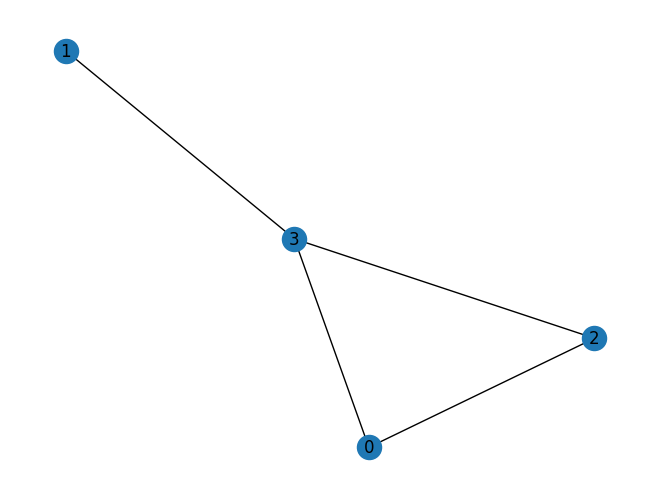

In [71]:
G = nx.gnp_random_graph(4,p=0.6)
draw = nx.draw
draw(G,with_labels=True)

In [73]:
A = nx.adjacency_matrix(G)
print(f"A = {A}")
A = A.todense()
print(f"A = {A}")
D = np.diag(np.sum(A,axis=0))
print(f"D = {D}")
inv_D = np.linalg.inv(D)
print(f"inv_D = {inv_D}")
T = np.dot(np.linalg.inv(D), A)
print(f"T = {T}")

A =   (0, 2)	1
  (0, 3)	1
  (1, 3)	1
  (2, 0)	1
  (2, 3)	1
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
A = [[0 0 1 1]
 [0 0 0 1]
 [1 0 0 1]
 [1 1 1 0]]
D = [[2 0 0 0]
 [0 1 0 0]
 [0 0 2 0]
 [0 0 0 3]]
inv_D = [[0.5        0.         0.         0.        ]
 [0.         1.         0.         0.        ]
 [0.         0.         0.5        0.        ]
 [0.         0.         0.         0.33333333]]
T = [[0.         0.         0.5        0.5       ]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.         0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]]


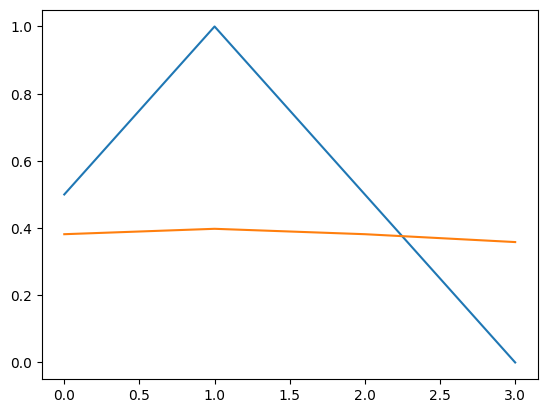

In [83]:
p = np.array([1/2,1,1/2,0]).reshape(-1,1)
walk = 10
plt.plot(p)
for w in range(walk):
    p = np.dot(T,p)
plt.plot(p)

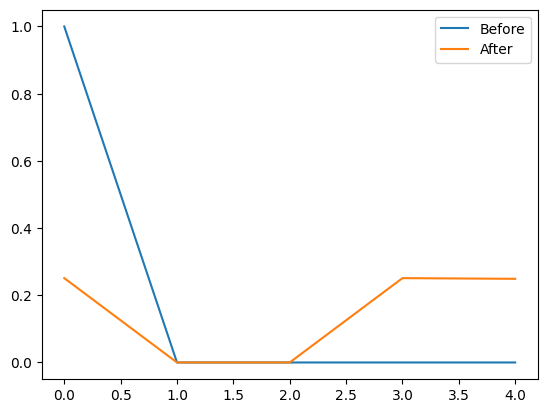

In [55]:
#G = nx.gnp_random_graph(5,0.5)
# Define a a random graph 
G = nx.erdos_renyi_graph(5,p=0.5)
# Extract the Adjaceny matrix of G
A = nx.adjacency_matrix(G)

A = A.todense()
A = np.array(A, dtype=np.float64)
D = np.diag(np.sum(A,axis=0))
T = np.dot(np.linalg.inv(D),A)
walk = 10
p = np.array([1,0,0,0,0]).reshape(-1,1)
plt.plot(p, label="Before")
visited = list()
for i in range(walk):
    p = np.dot(T,p)
plt.plot(p, label="After")
plt.legend()
visited.append(np.argmax(p))


In [31]:
visited

[4, 0, 4, 0, 4, 0, 4, 0, 4, 0]

In [23]:
visited

[1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

array([[0.14416899],
       [0.14156108],
       [0.142613  ],
       [0.1441532 ],
       [0.14203358]])